# Adaptive linear neurons
Adaline được công bố bởi Bernard Widrow và nghiên cứu sinh Tedd Hoff của ông ấy chỉ sau 1 vài năm so với thuật toán perceptron của Rosenblatt. Thuật toán này đặc biệt thú vị bởi nó minh họa các khái niệm chính để xác định và giảm các hàm chi phí liên tục. Điều này đặt nền tảng cho việc hiểu các thuật toán học máy nâng cao cho việc phân loại như: logistic regression, support vector machines, and regression models.
Sự khác biệt giữa Adaptive và Perceptron là weights được cập nhật dựa trên linear activation function chứ không phải là 1 unit step function như trong Perceptron. Trong Adaptive thì linear activation function 𝜙(𝑧), đơn giản là định nghĩa hàn của net input, vậy nên:
$$\phi(w^Tx) = w^Tx$$

Trong khi linear activation function dùng để học weights thì chúng ta vẫn dùng threshold function để dự đoán điểm kết thúc. Hàm này thì giống với unit step function đã được đề cập trước đó của Perceptron.
![alt text](./img/ComparePerceptronRuleAndAdaline.png)

# Giảm cost function với gradient descent
Một trong những thành phần chính của thuật toán học máy có giám sát là xác định objective function và tối ưu hóa trong suốt quá trình học. Objective function thường là 1 cost function mà chúng ta muốn giảm. Với Adaline chúng ta cần định nghĩa 1 cost function J, để học weights như __sum of squared errors (SSE)__ giữa kết quả tính toán và kết quả thực sự nhận được.
$$J(w)=\frac{1}{2}\sum_i(y^{(i)}-\phi(z^{(i)}))^2$$

Một tính chất tuyệt vời khác của cost function này là nó lồi. Do đó ta có thể sử dụng 1 thuật toán tối ưu hóa đơn giản gọi là __gradient descent__ để tìm weights và giảm cost function để phân loại.<br>
Với hình mình họa bên dưới ta có thể thấy được ý tưởng chính của __gradient descent__ là  **_climbing down a hill_** cho đến khi đạt được giá trị nhỏ nhất. Trong mỗi lần lặp chúng ta thực hiện 1 bước ngược hướng với gradient, ở đây kích thước của mỗi bước được xác định bởi giá trị của learning rate, cũng như độ dốc của gradient.
![atl text](./img/DescibeGradientDescent.png)

Dùng gradient descent ta có thể update weights bằng cách thực hiện 1 bước ngược hướng với gradient $\nabla J(w)$, của cost function $J(w)$.
$$w:=w + \Delta w$$
Weiht thay đổi $\Delta w$ thì được định nghĩa là âm gradient $-\nabla J(w)$ nhân với learning rate $\eta$.
$$\Delta w = -\eta\nabla J(w)$$
Tính gradient của cost function chúng ta cần tính đạo hàm từng phần của cost function đối với mỗi weights $w_j$.
$$\frac{\partial}{\partial w_j} = -\sum_i (y^{(i)} - \phi(z^{(i)}))x^{i}_j$$
Vì vậy có thể viết công thức cập nhật của $w_j$ là:
$$\nabla w_j = -\eta\frac{\partial J}{\partial w_j}=  \eta\sum_i \big(y^{(i)} - \phi (z^{(i)}) \big)x_j^{(i)}$$
Hơn nữa cập nhật weights tính toán dựa trên tất cả training dataset (thay vì cập nhật giảm weights sau mỗi lần training mẫu) đó là lý do tại sao phương pháp này cũng được gọi là __batch gradient descent__.

# Thực hiện Adaline trên python

In [22]:
import os
import pandas as pd
s = os.path.join('https://archive.ics.uci.edu', 'ml', 'machine-learning-databases', 'iris','iris.data')
df = pd.read_csv(s.replace("\\", "/"), header=None, encoding='utf-8')

In [23]:
import numpy as np
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values

In [24]:
class AdalineGD(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
        size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return X

    def predict(self, X):
        return np.where(self.activation(self.net_input(X))>= 0.0, 1, -1)

Như chúng ta cũng có thể thấy kết quả của biểu đồ cost function, chúng ta có 2 vấn đề sau. Biểu đồ bên trái cho ta thấy những gì xảy ra khi ta chọn learning rate quá lớn. Thay vì giảm cost function, error trở nên lớn hơn sau mỗi epoch, bởi vì chúng đã __*overshoot*__ mức global minimum. Ngược lại chúng ta có thể thấy cost giảm ở biểu đồ bên phải. Tuy nhiên learning rate $\eta = 0.0001$ thì quá nhỏ mà điều này yêu cầu cần phải có số lượng lớn epoch để có thể hội tụ về global minimum.

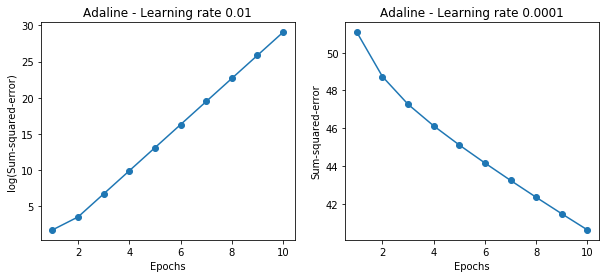

In [25]:
import matplotlib.pyplot as plt
from sklearn import datasets

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)

ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1),ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

Hình dưới đây minh họa những gì xảy ra nếu chúng ta thay đổi giá trị của weights để giảm cost function $J$.

![alt text](./img/overshoot.png)

# Cải thiện gradient descent thông qua feature scaling
Chúng ta sẽ dùng phương thức feature scaling được gọi là __standardization__. Cung cấp cho dữ liệu của chúng ta tính chất của phân phối chuẩn: __zero-mean__ và __unit variance__. Thủ tục chuẩn hóa này giúp cho gradient descent hội tụ nhanh hơn tuy nhiên nó không làm cho tập dataset thành phân phối chuẩn. Standardization làm thay đổi giá trị trung bình của mỗi feature sao cho nó ở giữa và mỗi feature có độ lệch chuẩn của 1 (unit variance).<br>
Ví dụ: cho standardize của feature $j$th, chúng ta có thể trừ trung bình của mẫu $\mu_j$ và chia nó với độ lệch chuẩn $\sigma_j$.
$$x^{'}_j=\frac{x_j - \mu_j}{\sigma_j}$$

Một trong những lý do tại sao standardization giúp cho gradient descent tối ưu hóa hơn là trải qua ít bước hơn để tìm ra giải pháp tối ưu (global cost minimum).<br>
Như ta có minh họa sau:
![alt text](./img/Standardization.png)

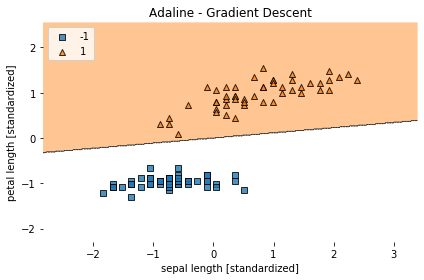

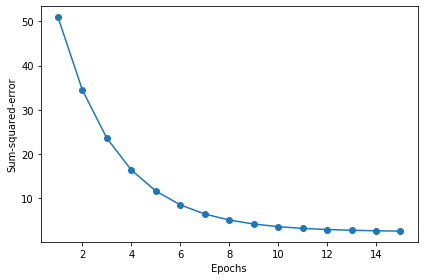

In [26]:
from mlxtend.plotting import plot_decision_regions

X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

ada_gd = AdalineGD(n_iter=15, eta=0.01)
ada_gd.fit(X_std, y)

plot_decision_regions(X_std, y, clf=ada_gd)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.tight_layout()
plt.show()

# Học máy quy mô lớn và stochastic gradient descent


Trong phần trước, chúng ta đã học làm thế nào để giảm cost function bởi các bước ngược hướng với cost gradien từ toàn bộ training dataset, đó là lý do tại sao cách tiếp cận này còn được gọi là batch gradient descent. Bây giờ hãy tưởng tượng nếu chúng ta có bộ dataset có hàng triệu data, chạy batch gradient descent rất tốn kém trong các tình huống như thế vì chúng ta cần đánh giá lại toàn bộ tập dữ liệu mỗi lần chúng ta thực hiện 1 bước để di chuyển đến global gradient minimum.<br>
Thay thế phổ biến của batch gradient descent là __stochastic gradient descent (SGD)__ ngoài ra còn có thể gọi cách cách khác là iterative hoặc online gradient descent.
Thay vì update weights dựa trên tổng lỗi tích lũy trên tất cả training sample $x^i$.
$$\Delta w = \eta \sum_i (y^{(i)} - \phi (z^{(i)}))x^{(i)}$$
Chúng ta cập nhật weights giảm cho mỗi training example.
$$\eta (y^{(i)} - \phi (z^{(i)}))x^{(i)}$$

Mặc dù SGD xem như xấp xỉ gradient descent. Nó hội tụ nhanh hơn vì thường xuyên cập nhật weights, mỗi gradient thì được tính toán dựa trên 1 training example. Điều này có lợi thế là SGD có thể thoát khỏi local minima nhanh hơn nếu chúng ta làm việc với nonlinear cost function. Để đạt được kết quả thõa mãn SGD, nó thì quan trọng để training dataset hiện tại 1 cách random. Chúng tôi muốn xáo trộn dataset cho mỗi epoch để ngăn vòng lặp.<br>
__Điều chỉnh learning rate trong suốt quá trình training:__<br>
Trong quá trình thực hiện SGD, fixed learning rate thường được thay thế bởi adaptive learning rate giảm dần theo thời gian. <br>
Ví dụ:
$$\frac {c_1}{[number of iterations] + c_2}$$
Ở đây $c_1$ và $c_2$ là 1 hằng số. <br>
__Chú ý:__<br>
SGD không đạt global minimum mà chỉ rất gần với nó. Và dùng adaptive learning rating chúng ta có thể đạt được cost minimum.

Cải tiến khác của SGD là chúng ta có thể dùng nó cho online learning rate. Trong online learning, model của chúng ta có thể traning ngay khi dữ liệu mới đến. Điều này đặc biệt hữu ích khi ta có lượng lớn dữ liệu tích lũy. Dùng online learning, hệ thống có thể thích nghi ngay với những thay đổi và dữ liệu training có thể được bỏ đi sau khi cập nhật model nếu kho lưu trữ có hạn.

__Mini-batch gradient descent__<br>
Sự kết hợp giữa batch gradient descent và SGD còn được gọi là mini-batch gradient descent. Mini-batch gradient descent có thể được hiểu là giảm gradient cho các tập dữ liệu con nhỏ hơn. Nó có lợi thế hơn batch gradient descent là hội tụ nhanh hơn vì weights được cập nhật thường xuyên. Hơn thế nữa mini-batch gradient descent cho phép chúng ta thay thế vòng lặp for bằng cách tận dụng khái niệm vector hóa từ đại số tuyến tính. Điều này cải thiện hiệu quả tính toán cho thuật toán.

__Hiện thực hóa thuật toán Adaline SGD với python:__

In [29]:
class AdalineSGD(object):
    def __init__(self, eta=0.01, n_iter=10,
        shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
    
    def fit(self, X, y):
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self, X, y):
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self
    
    def _shuffle(self, X, y):
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
    
    def _update_weights(self, xi, target):
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return X

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)
    

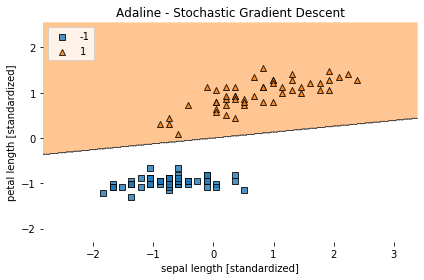

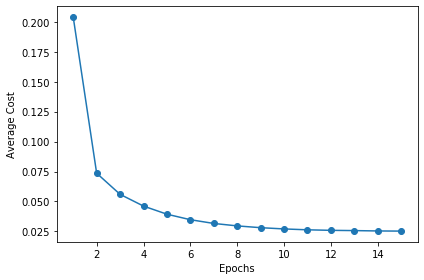

In [32]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)
plot_decision_regions(X_std, y, clf=ada_sgd)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.tight_layout()
plt.show()

Như các bạn có thể thấy chi phí trung bình giảm khá nhanh và hoàn thành sau 15 epoch trông tương tự như gradient descent Adaline. Nếu chúng ta muốn cập nhật model trên online learning với streaming data. Chúng ta có thể gọi phương thức partial_fit.<br>
Ví dụ:<br>
ada_sgd.partial_fit(X_std[0, :], y[0]).